<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Построим-модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Построим-модель-прогнозирования-оттока-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Построим модель прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Базовые-рекомендации-по-работе-с-клиентами" data-toc-modified-id="Базовые-рекомендации-по-работе-с-клиентами-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Базовые рекомендации по работе с клиентами</a></span></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Исследование оттока клиентов сети фитнес-центров «Культурист-датасаентист»

## Описание проекта

На основе анализа данных анкет клиентов необходимо:  
1) спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;  
2) сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;  
3) проанализировать основные признаки, наиболее сильно влияющие на отток;  
4) сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:  
  * выделить целевые группы клиентов;  
  * предложить меры по снижению оттока;
  * определить другие особенности взаимодействия с клиентами.

## Загрузка данных

In [2]:
# путь к документу
path = 'E:\\Python\\datasets\\'

In [3]:
gym = pd.read_csv(path + 'gym_churn.csv')

In [4]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<ins>***Описание данных***</ins>  
**gender** — пол;  
**Near_Location** — проживание или работа в районе, где находится фитнес-центр;  
**Partner** — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);  
**Promo_friends** — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);  
**Phone** — наличие контактного телефона;  
**Contract_period** — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);   
**Group_visits** — факт посещения групповых занятий;  
**Age** — возраст;  
**Avg_additional_charges_total** — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон;  
**Month_to_end_contract** — срок до окончания текущего действующего абонемента (в месяцах);   
**Lifetime** — время с момента первого обращения в фитнес-центр (в месяцах);  
**Avg_class_frequency_total** — средняя частота посещений в неделю за все время с начала действия абонемента;  
**Avg_class_frequency_current_month** — средняя частота посещений в неделю за предыдущий месяц;  
**Churn** — факт оттока в текущем месяце.

## Предобработка данных

Проверим пропуски и типы данных:

In [5]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


В нашем датасете 4000 строк, пропусков нет.

Проверим нет ли дубликатов среди 4000 строк:

In [6]:
gym.duplicated().sum()

0

## Исследовательский анализ данных (EDA)

Изучим средние значения и стандартные отклонения признаков:

In [7]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Из имеющихся данных видно, что для нашей сети фитнес-центров характерно:  
* мужчин и женщин примерно поровну;  
* наши клиенты в основном проживают или работают в районе, где находится фитнес-центр;  
* почти половина клиентов - сотрудники компаний-партнёров клуба;  
* треть клиентов пришли в рамках акции "приведи друга";  
* 10% клиентов не оставили свой контактный телефон;  
* самым популярным является абонемент на полгода;  
* 41% клиентов посещают групповые занятия;  
* средний возраст клиентов - 29 лет;  
* наши клиенты тратят за дополнительные услуги от 0,148 до 552,59 ден. ед. (в среднем примерно 146 ден. ед.);  
* в среднем у клиентов еще 4,3 месяца до окончания действия абонемента;  
* есть клиенты, которые только первый раз обратились к нам, а есть такие, кто уже два с половиной года к нам ходит, в средняя же продолжительность - 3,7 месяца;  
* кто-то тренируется 6 дней в неделю, кто-то не приходит ни разу за неделю, а в среднем же 1,87 посещений в неделю (за все время);  
* за последний месяц среднее значение сократилось до 1,76 посеещений в неделю.
* отток - 26,53%.

У переменных Age и Avg_additional_charges_total разные по величине стандартные отклонения: переменные нужно стандартизировать перед обучением.

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался:

In [8]:
# группируем данные по признаку оттока, находим средние значения признаков, транспонируем таблицу, сбрасываем индексы
gym_churn = gym.groupby('Churn').mean().T.reset_index()

# переименовываем столбцы
gym_churn.columns = ['Признак', 'Оставшиеся клиенты', 'Ушедшие клиенты']

gym_churn

,Признак,Оставшиеся клиенты,Ушедшие клиенты
0,gender,0.510037,0.510839
1,Near_Location,0.873086,0.768143
2,Partner,0.534195,0.355325
3,Promo_friends,0.353522,0.183789
4,Phone,0.903709,0.902922
5,Contract_period,5.747193,1.728558
6,Group_visits,0.464103,0.268615
7,Age,29.976523,26.989632
8,Avg_additional_charges_total,158.445715,115.082899
9,Month_to_end_contract,5.283089,1.662582


Для тех кто ушел характерны следующие признаки:  
- больше процент тех, кто жил или работал **в других районах**;  
- больше процент тех, кто **не сотрудники компаний-партнёров клуба**; 
- меньше тех, кто пришел **не по приглашению друзей**;  
- купили **абонементы на короткий срок**;  
- **реже ходят на групповые занятия**;  
- средний возраст **27 лет**;  
- **меньше тратят** на дополнительные услуги;  
- скоро **заканчивается абонемент** (1,7 месяца); 
- **не так долго ходят** в наш фитнес-центр;  
- в целом они **посещают** наш фитнес-центр чуть больше **1 раза в неделю**.

Разделим наш исходный датасет на два: в одном сохраним всех оставшихся клиентов, в другом - тех, кто ушел:

In [9]:
churn = gym.loc[gym.loc[:,'Churn'] == 1]
stay = gym.loc[gym.loc[:,'Churn'] == 0]

Постром столбчатые гистограммы и распределения признаков для тех, кто ушёл и тех, кто остался:

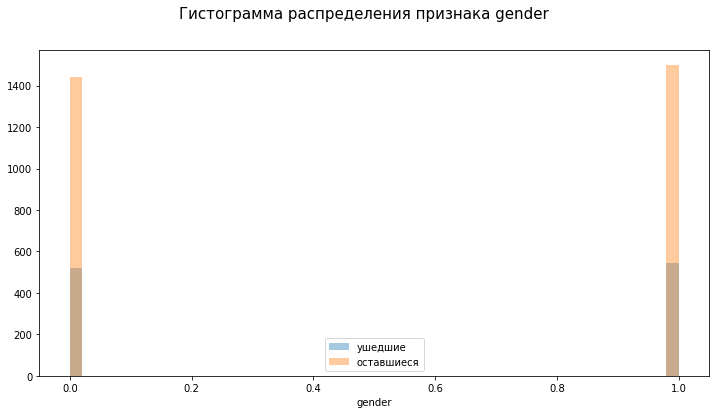

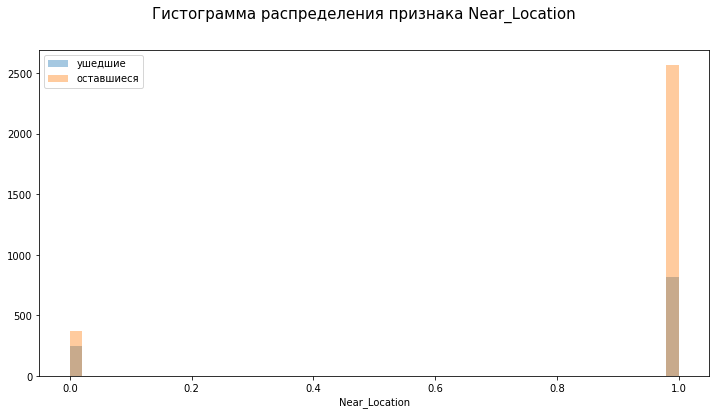

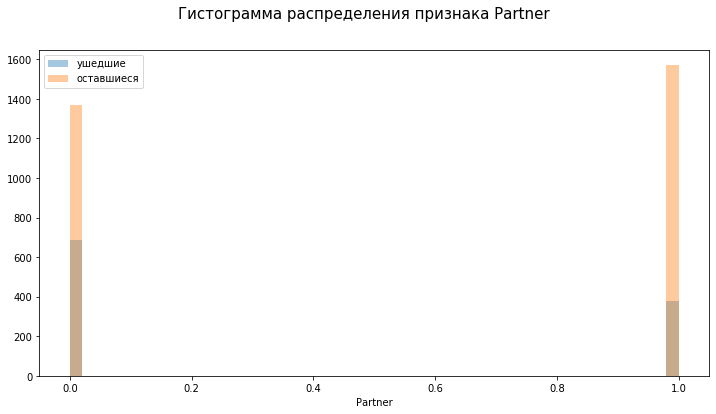

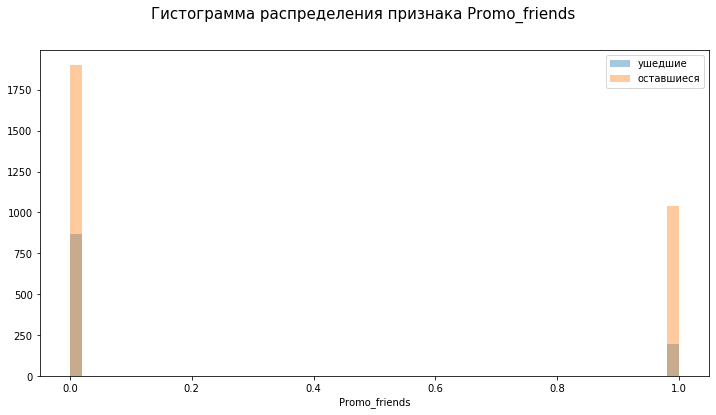

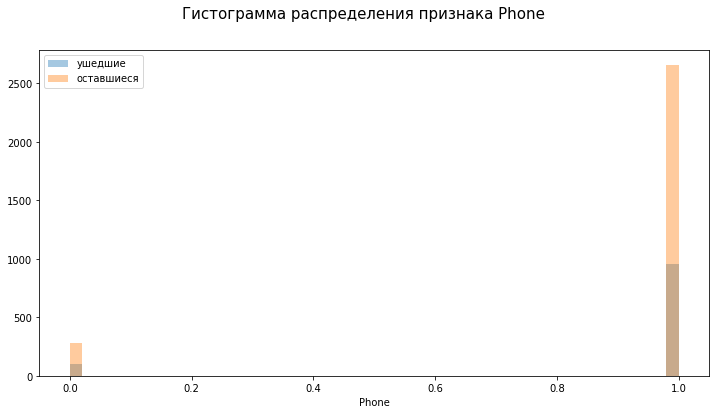

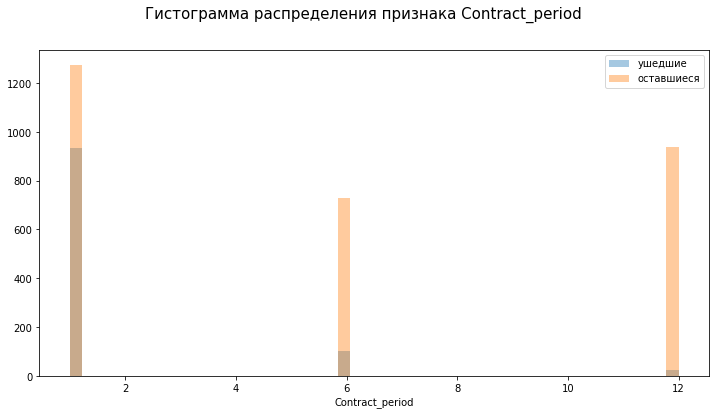

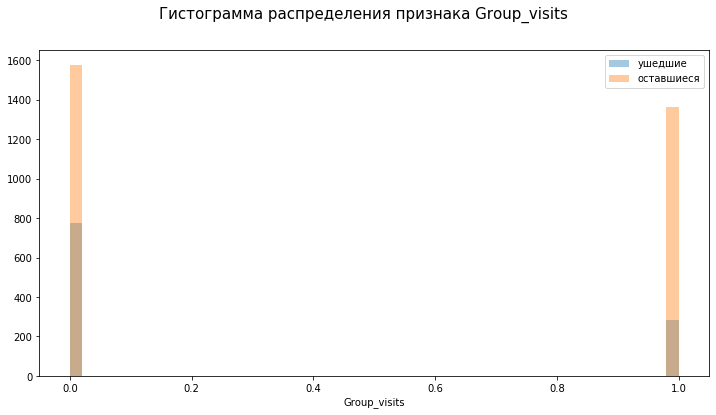

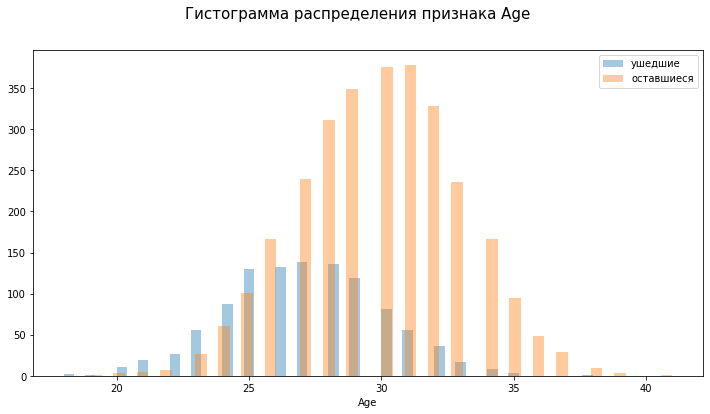

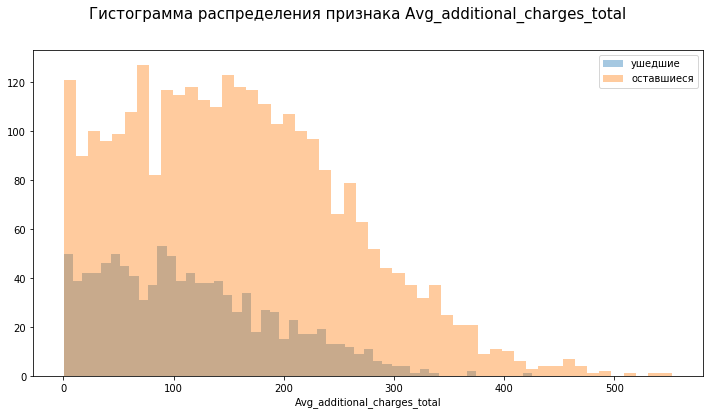

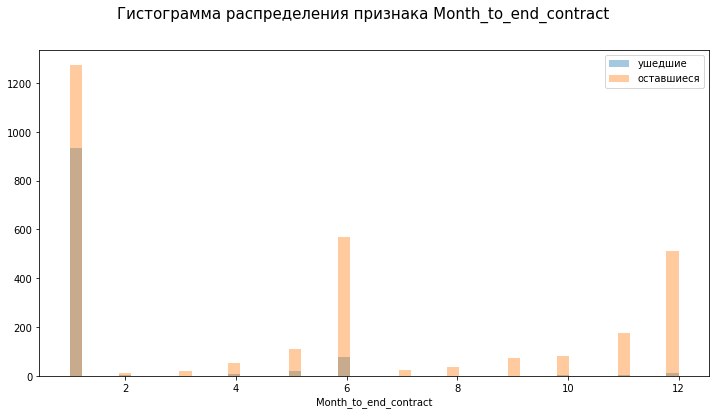

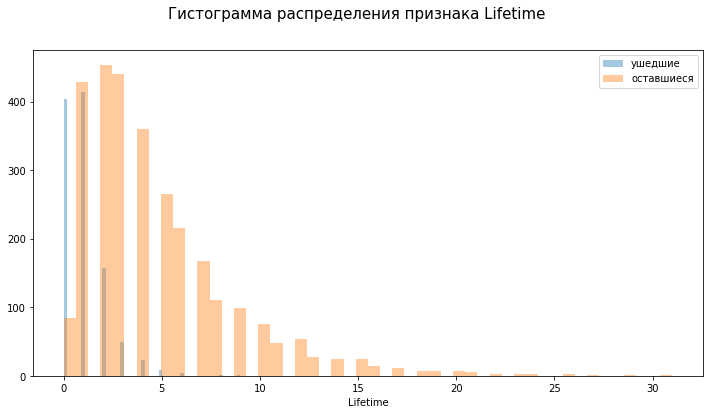

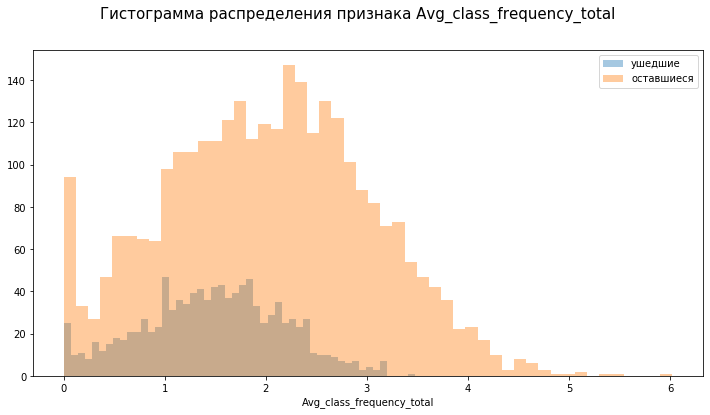

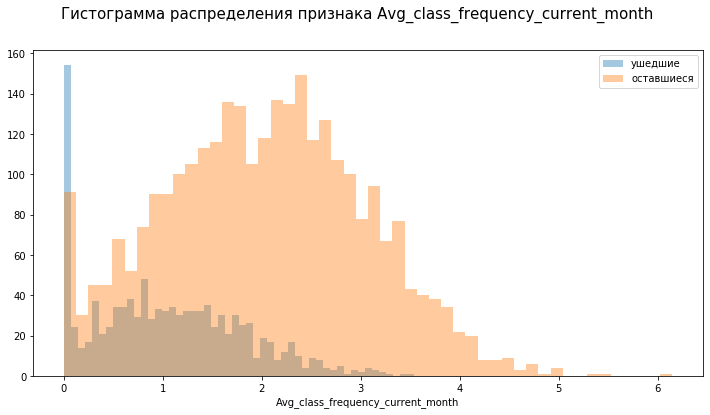

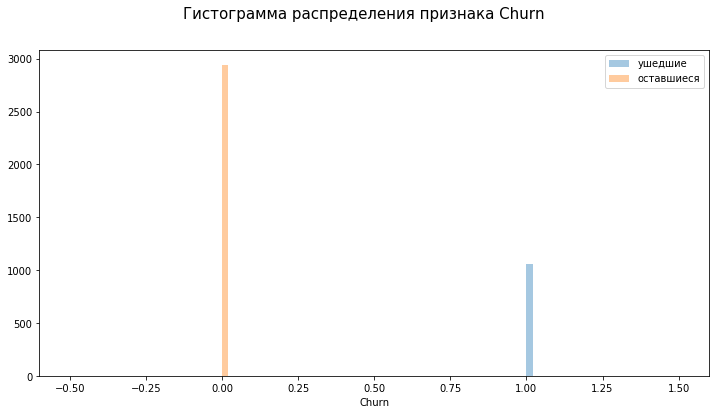

In [10]:
for feature in gym.columns:
    plt.figure(figsize=(12, 6))
    sns.distplot(churn[feature], bins = 50, label='ушедшие', kde=False)
    sns.distplot(stay[feature], bins = 50, label='оставшиеся', kde=False)
    plt.suptitle('Гистограмма распределения признака {}'.format(feature), fontsize=15)
    plt.legend()
    plt.show() 

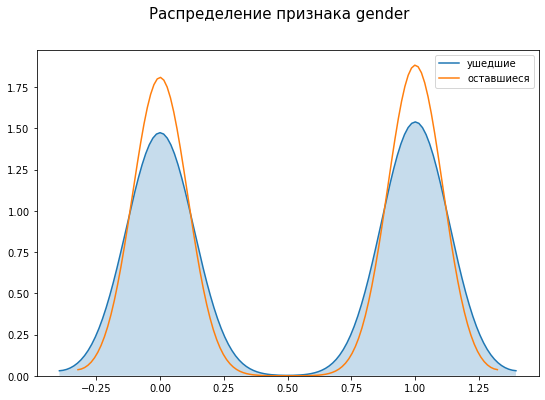

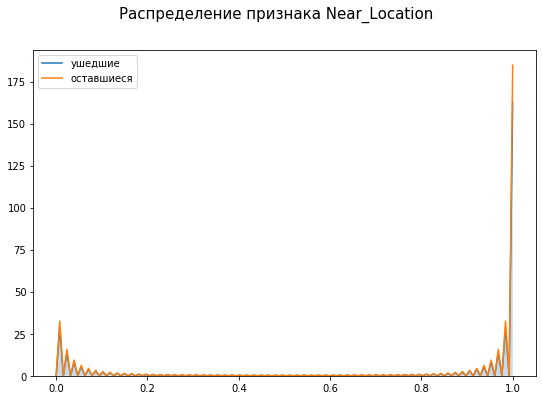

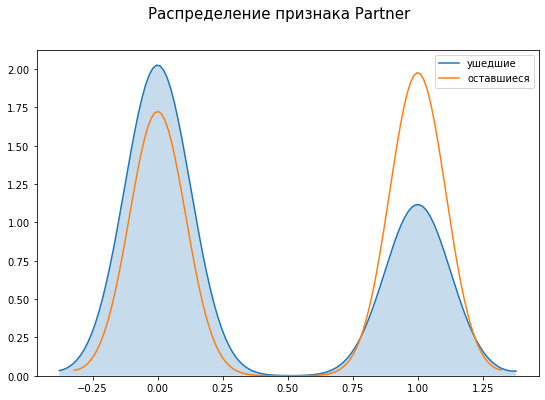

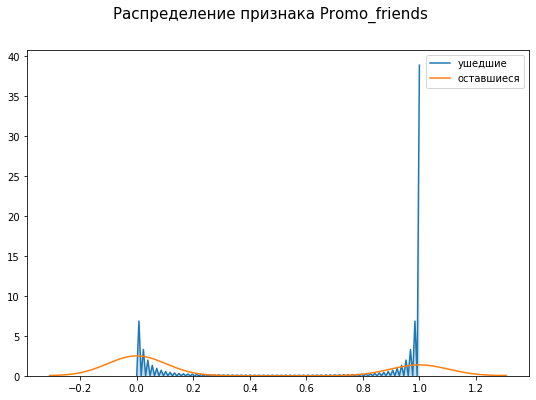

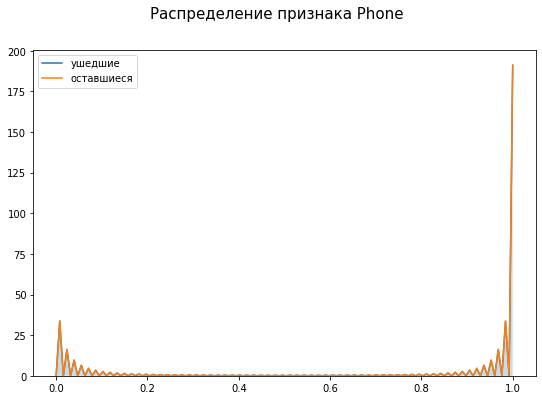

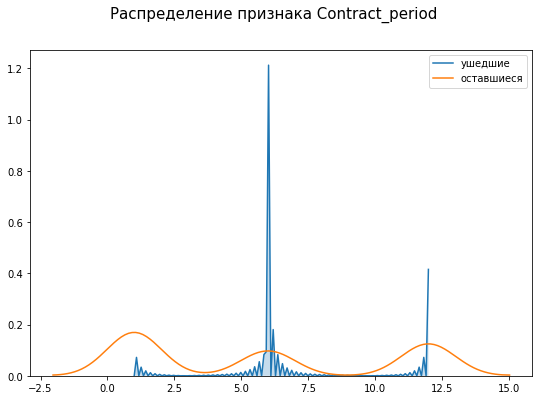

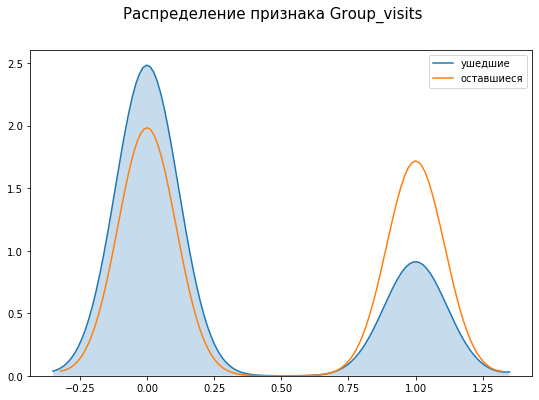

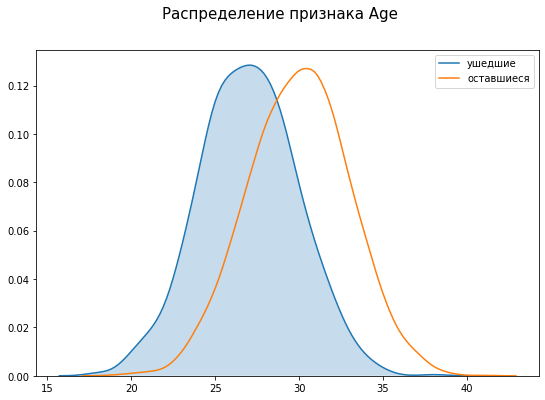

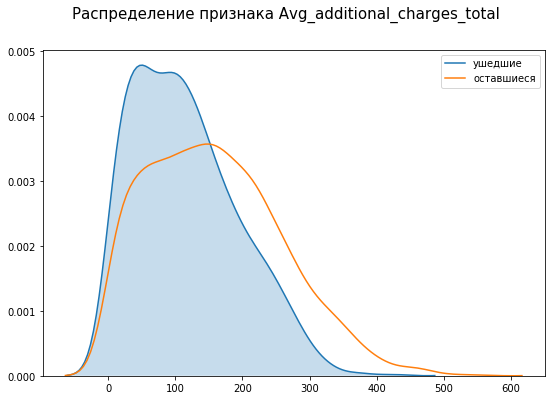

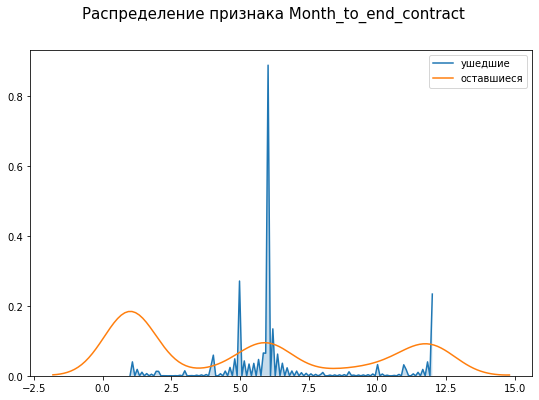

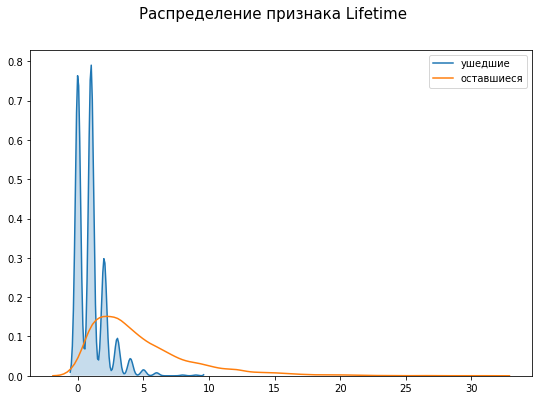

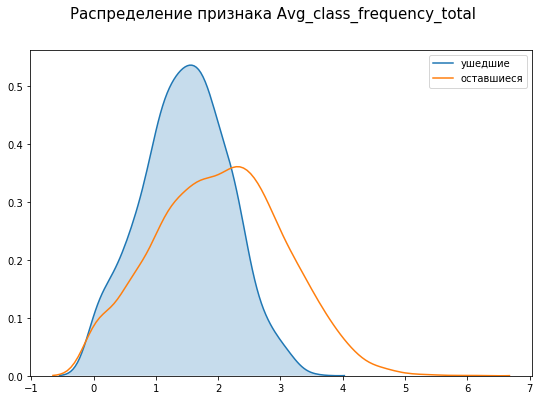

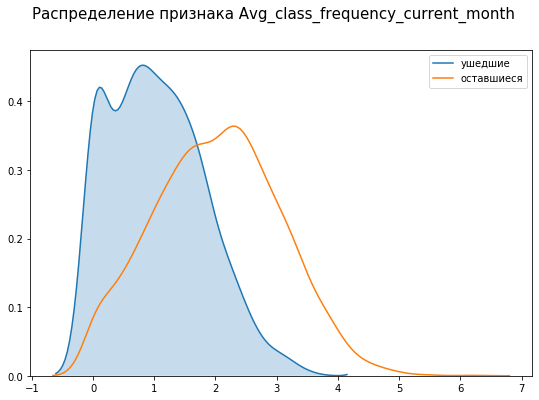

In [11]:
for feature in gym.drop('Churn', axis=1).columns:
    plt.figure(figsize=(9, 6))
    sns.kdeplot(data=churn[feature], label='ушедшие', shade=True)
    sns.kdeplot(data=stay[feature], label='оставшиеся')
    plt.suptitle('Распределение признака {}'.format(feature), fontsize=15)
    plt.legend()
    plt.show()

Построим матрицу корреляций:

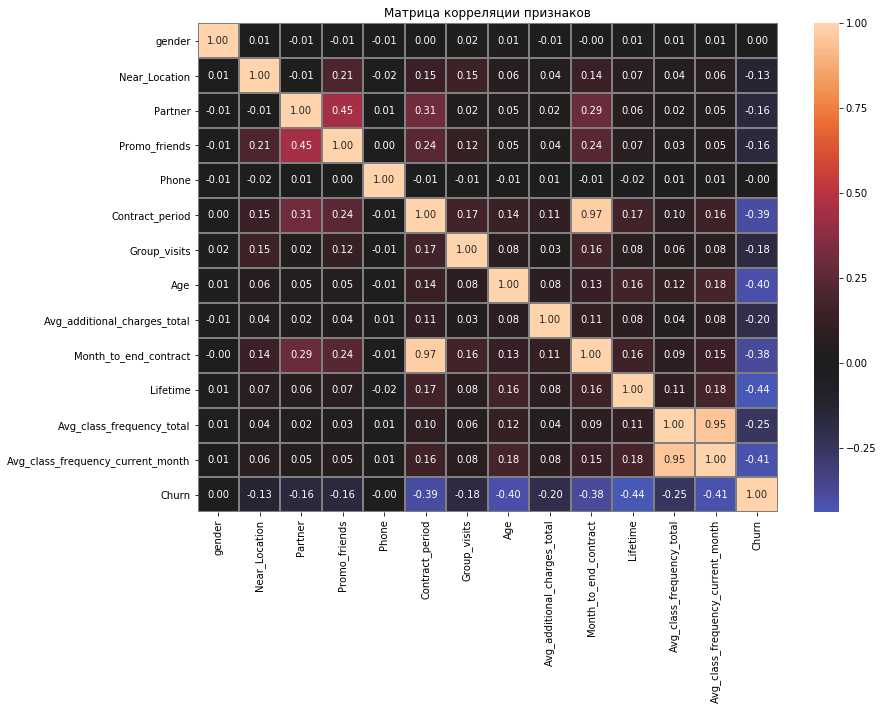

In [12]:
plt.figure(figsize=(13, 9))
plt.title('Матрица корреляции признаков')
sns.heatmap(gym.corr(), annot=True, fmt='.2f', linewidths=1, linecolor='gray', center=0);

Можно заметить, что сильнее всего между собой коррелируют следующие признаки:  
- параметр **Avg_class_frequency_current_month** (средняя частота посещений в неделю за предыдущий месяц) и параметр **Avg_class_frequency_total** (средняя частота посещений в неделю за все время), коэффициент корреляции **0,95**;  
- параметр **Partner** (сотрудник компании-партнёра клуба) и параметр **Promo friends** (участник акции "приведи друга") коэффициент корреляции **0,45**; 
- параметр **Month to end contract** (срок до окончания текущего действующего абонемента) и параметр **Churn** (отток) коэффициент корреляции **-0,38**; 
- параметр **Contract period** (длительность текущего действующего абонемента) и параметр **Churn** (отток) коэффициент корреляции **-0,39**; 
- параметр **Age** (возраст) и параметр **Churn** (отток) коэффициент корреляции **-0,40**;  
- параметр **Avg_class_frequency_current_month** (средняя частота посещений в неделю за предыдущий месяц) и параметр **Churn** (отток) коэффициент корреляции **-0,41**; 
- параметр **Lifetime** (время с момента первого обращения в фитнес-центр) и параметр **Churn** (отток) коэффициент корреляции **-0,44**.

Чтобы в дальнейшем избавиться от мультиколлинеарности удалим из наших данных столбец с признаком **Avg_class_frequency_total**: по сути он показываетодно что-то похожее на **Avg_class_frequency_current_month**, но последний лучше коррелирует с нашей целевой переменной.

In [13]:
gym_copy = gym.copy()
gym_copy = gym_copy.drop('Avg_class_frequency_total', axis=1)

## Построим модель прогнозирования оттока клиентов

Разделим данные на признаки (матрица X) и целевую переменную (y):

In [14]:
X = gym_copy.drop('Churn', axis = 1)
y = gym_copy['Churn']

Hазделим модель на обучающую и валидационную выборку

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

Стандартизуем признаки:

In [16]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

X_test_st = scaler.transform(X_test)

Зададим модели:

In [17]:
models = [LogisticRegression(solver='liblinear', random_state=0), 
          RandomForestClassifier(n_estimators = 50, random_state=0)]

Напишем функцию, которая принимает на вход модель и данные и выводит метрики:

In [18]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('ACC:{:.2f} Precision:{:.2f} Recall:{:.2f} F1:{:.2f}'.format(accuracy_score(y_test, y_pred),  
                                                             precision_score(y_test, y_pred),
                                                             recall_score(y_test, y_pred),
                                                             f1_score(y_test, y_pred)))

In [19]:
# напишем цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(m=i,X_train = X_train_st, y_train= y_train, X_test=X_test_st, y_test = y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
ACC:0.92 Precision:0.84 Recall:0.83 F1:0.84
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
ACC:0.92 Precision:0.87 Recall:0.80 F1:0.84


В целом метрики близки:

| Метрики | LogisticRegression | RandomForestClassifier |
| :-- |:--:| :--:|
| Accuracy | 0,92 | 0,92 |
| Precision | 0,84 | 0,87 |
| Recall | 0,83 | 0,80 |
| F1 | 0,84 | 0,84 |

Таким образом, кажется, что обе модели прогнозируют отток примерно с одинаковой вероятностью. Теперь вопрос стоит в том, какая метрика для нас более важна: precision или recall. Думаю в нашем случае precision более важен, так как каждое срабатывание модели — факт отнесения к классу "1" — будет стоить нам ресурсов, и мы не хотим, чтобы модель часто срабатывала впустую.

## Кластеризация клиентов

Проведем стандартизацию данных перед работой с алгоритмами:

In [20]:
X_sc = scaler.fit_transform(X)

Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму:

In [21]:
linked = linkage(X_sc, method = 'ward')

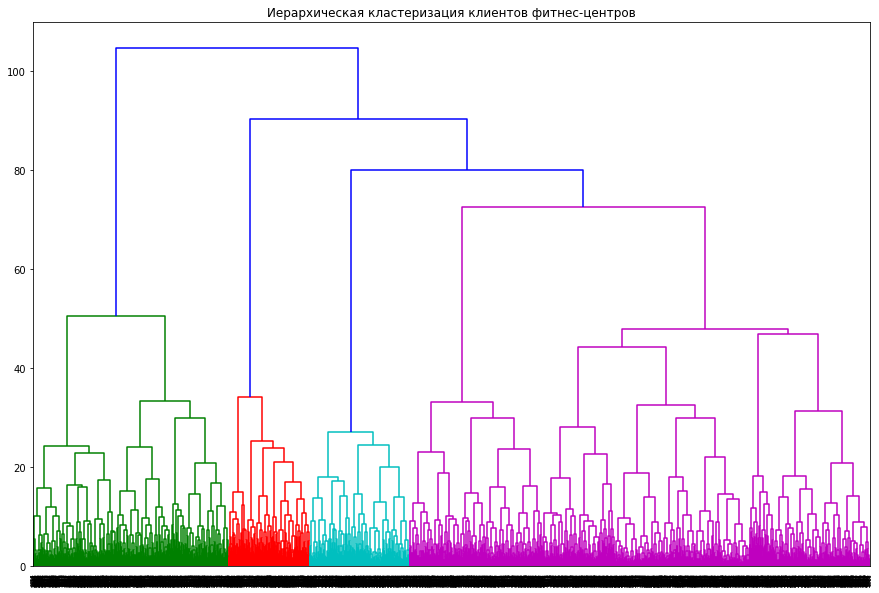

In [22]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов фитнес-центров')
plt.show()

Агломеративная иерархическая кластеризация предложила поделить клиентов на **4 кластера**.

Теперь обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов:

In [23]:
km = KMeans(n_clusters = 5,  random_state=0) # задаём число кластеров, равное 5
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров

Сохраним метки кластера в поле нашего датасета:

In [24]:
gym_copy['cluster'] = labels

Посмотрим на средние значения признаков для кластеров:

In [25]:
gym_copy_cluster = gym_copy.groupby(['cluster']).mean().round(4)
gym_copy_cluster.T

cluster,0,1,2,3,4
gender,0.5029,0.5050,0.4706,0.5613,0.5233
Near_Location,0.0000,0.9635,1.0000,0.9989,0.8627
Partner,0.4648,0.7867,0.3613,0.2942,0.4715
Promo_friends,0.0781,0.5761,0.2306,0.2128,0.3057
Phone,1.0000,1.0000,1.0000,1.0000,0.0000
Contract_period,2.4286,10.5998,1.7638,2.2682,4.7772
Group_visits,0.2171,0.5369,0.2540,0.5527,0.4275
Age,28.5810,29.8469,27.3128,30.8675,29.2979
Avg_additional_charges_total,136.2800,161.1782,116.9235,172.1237,144.2082
Month_to_end_contract,2.2724,9.6673,1.6816,2.1368,4.4663


Самый большой отток наблюдается в **кластере 2** - 61,81%. Для этого класстера характерно:  
- все клиенты, отенесенные к этому кластеру живут или работают в том же районе;  
- все клиенты, отенесенные к этому кластеру указывали свой номер телефона;  
- у клиентов из этого кластера наименьшая средняя длительность текущего действующего абонемента;  
- самый низкий средний возраст клиентов;  
- меньше остальных тратили деньги на дополнительные услуги;  
- самый короткий срок до окончания абонемента;  
- самое короткое время с момента первого обращения в фитнес-центр;  
- самая низкая средняя частота посещений в неделю за предыдущий месяц.

На втором месте по оттоку **кластер 0** (42,67%), для которого характерно:  
- все клиенты из этого кластера не живут и не работают в том же районе;  
- самая маленькая доля среди тех, кто пришел в рамках акции "приведи друга";  
- самая маленькая доля посещений групповых занятий.  

**Кластер 4** третий по показателю оттока (26,68%):  
- все, кто попал в этот кластер не указали свой номер телефон.  

**Кластер 3** четвертый по показателю оттока (4,45%):  
- практически все клиенты, отенесенные к этому кластеру живут или работают в том же районе;  
- самая маленькая доля клиентов-сотрудников компании-партнёра клуба;  
- самая большая доля посещений групповых занятий;  
- самый высокий средний возраст клиентов;  
- больше остальных тратили на дополнительные услуги;  
- самая длительная продолжительность посещения фитнес-центра;  
- самая высокая средняя частота посещений в неделю за предыдущий месяц.  

**Кластер 1** пятый по показателю оттока (2,83%):
- практически все клиенты, отенесенные к этому кластеру живут или работают в том же районе;  
- самая большая доля клиентов-сотрудников компании-партнёра клуба;  
- самая большая доля среди тех, кто пришел в рамках акции "приведи друга";
- наибольшая средняя длительность текущего действующего абонемента;  
- так же много тратят на дополнительные услуги;  
- наибольший средний срок до окончания текущего действующего абонемента;  
- средняя частота посещений в неделю за предыдущий месяц больше 2 раз.

Построим гистограммы распределения признаков для кластеров:

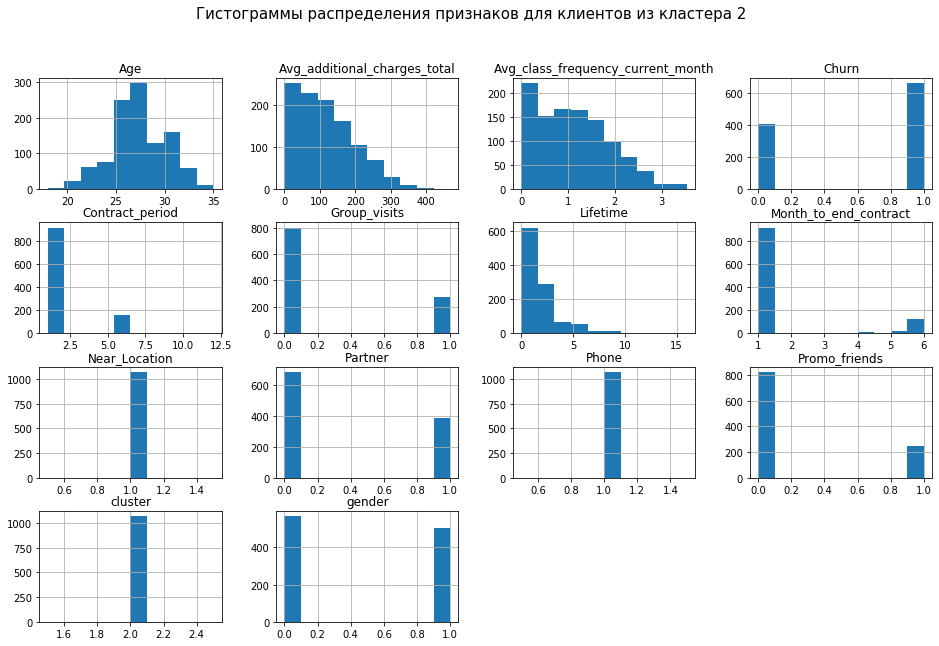

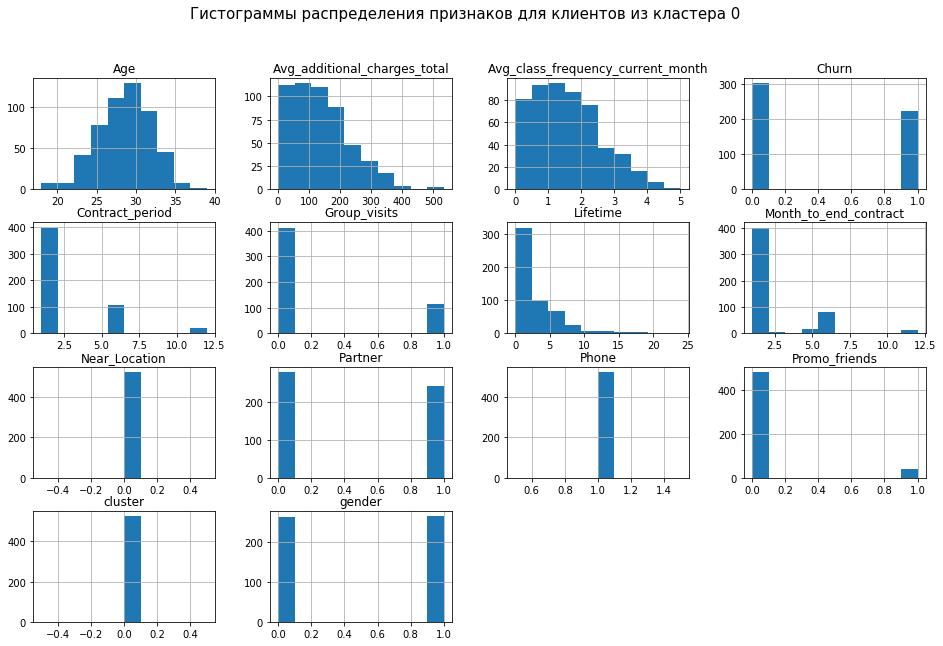

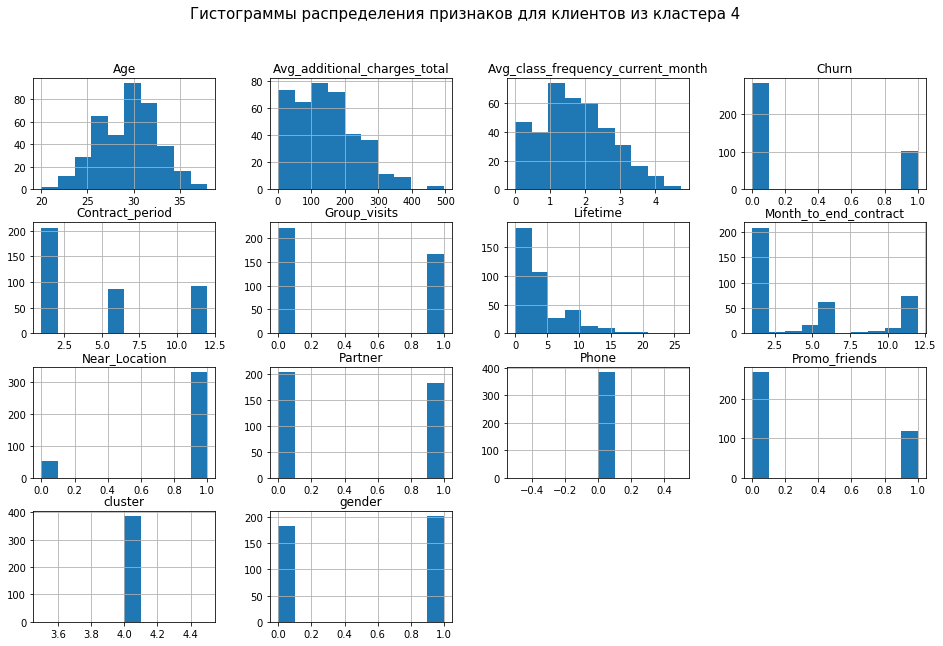

In [ ]:
for value in [2, 0, 4, 3, 1]:
    gym_copy.query('cluster == @value').hist(figsize=(16,10))
    plt.suptitle('Гистограммы распределения признаков для клиентов из кластера {}'.format(value), fontsize=15)
    plt.show()

## Базовые рекомендации по работе с клиентами

На основе анализа второго кластера клиентов (для которого отток равен 61,8%), третьего и первого кластеров (для которых отток составляет 4,45% и 2,83% соответственно) можно сформулировать следующие рекомендации:  
1) активнее рекламировать фитнес-центры среди жителей района (после трудного дня люди врятли поедут в другой район заниматься фитнесом);    
2) дальше развивать партнерские программы (поиск новых клиентов партнеров) и стимулировать заниматься в компании друзей;  
3) стимулировать клиентов в покупке более длительных абонементов;  
4) проводить разнообразные и интересные групповые занятия.